/Users/brash/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/brash/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


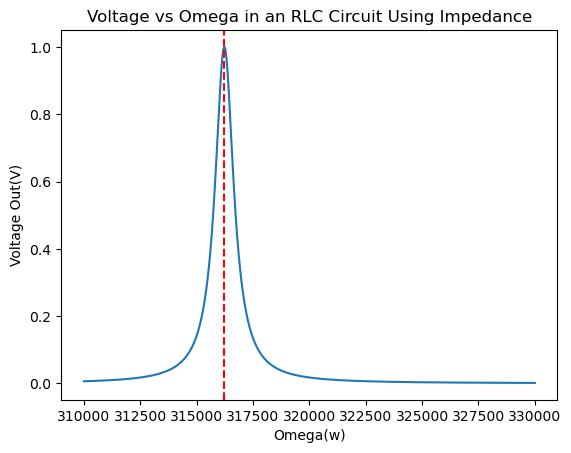

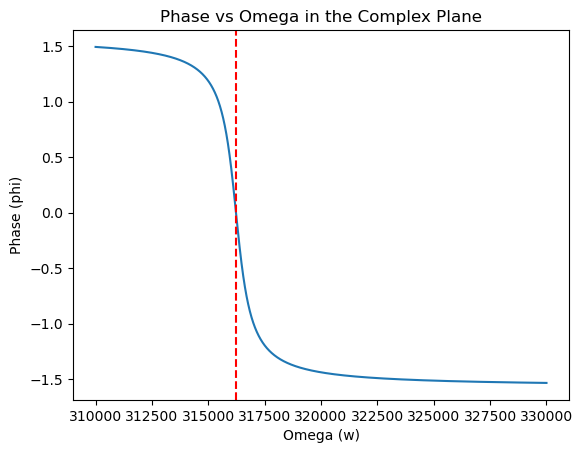

In [1]:
#Problem 2
#Part a and b



import numpy as np
import matplotlib.pyplot as plt

#Initialize Variables
Vin = 1
L = 10e-6
R = 1e3
C = 1e-6


#Make an array of omega from 310000 to 330000 with 10,000 numbers in between
omega = np.linspace(310000, 330000, 10000)


#Voltage calculation function: Takes in omega array, L R and C of my circuit and produces the Vout array which will then be used for plotting. 
def V(omega, L, R, C):
    ZL = 1j*omega*L
    ZC = 1/(1j*omega*C)
    Zeff = (ZL*ZC)/(ZL+ZC)
    return Zeff/(R+Zeff)

#Just makes the output of V function as a variable
Vout = V(omega, L, R, C)


#Takes in both the real and complex parts of Vout and uses np.real() and np.imag() to find the phase. I put both functions into the np.arctan function to get the phase. 
def phase_angle(Vout):
    #phase = np.angle(Vout, deg = True)
    phase = np.arctan(np.imag(Vout)/np.real(Vout))
    return phase

#Just makes the output of phase_angle as a variable
phase = phase_angle(Vout)



#Graphs both Omega vs Vout and Omega vs phase

#### Note: Part B of my problem is answered using the red vertical line. This red vertical line represents the resonant frequency. At this red line, in the first graph, we can see that the Vout shoots up to 1 and immediately back down at exactly the resonant frequency. In the second graph, my red vertical line also represents my resonant frequency but at exactly this time, the shape of the phase angle graph goes from concave down to concave up (also known as an inflection point). 
plt.plot(omega, Vout)
plt.xlabel('Omega(w)')
plt.ylabel('Voltage Out(V)')
plt.title('Voltage vs Omega in an RLC Circuit Using Impedance')
plt.axvline(x=1/np.sqrt(L*C), color='r', linestyle='--', label='Vertical Line')
plt.show()


plt.plot(omega, phase)
plt.xlabel('Omega (w)')
plt.ylabel('Phase (phi)')
plt.title('Phase vs Omega in the Complex Plane')
plt.axvline(x=1/np.sqrt(L*C), color='r', linestyle='--', label='Vertical Line')
plt.show()

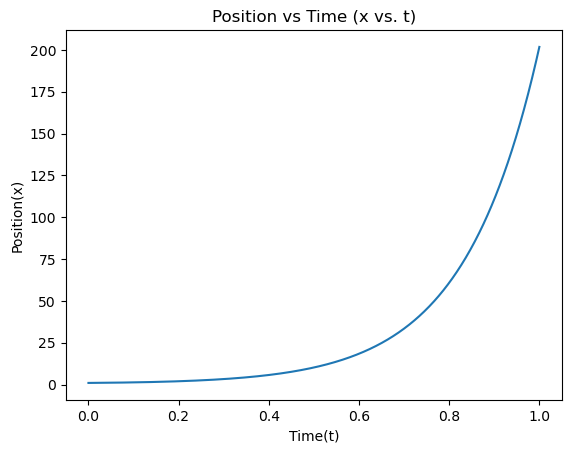

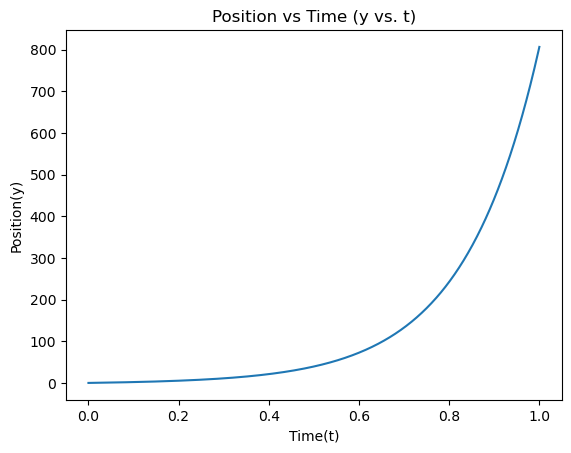

In [2]:
#Problem 3
#Coupled Oscillators

import numpy as np
import matplotlib.pyplot as plt

#Simply my explicit solutions from my work on paper
t = np.linspace(0, 1, 1000)
x = .5*np.exp(6*t)+ .5*np.exp(-2*t)
y = 2*np.exp(6*t) -2*np.exp(-2*t)

#Plots of x vs t and y vs t
plt.plot(t, x)
plt.xlabel('Time(t)')
plt.ylabel('Position(x)')
plt.title('Position vs Time (x vs. t)')
plt.show()

plt.plot(t, y)
plt.xlabel('Time(t)')
plt.ylabel('Position(y)')
plt.title('Position vs Time (y vs. t)')
plt.show()

a0 is: pi/2 

My an term is:
      n     
2⋅(-1)    2 
─────── - ──
    2      2
   n      n 
────────────
     π      


My bn term is:
0


The value of the fourier series with 5 non-zero terms is 0.105 at x = 0.


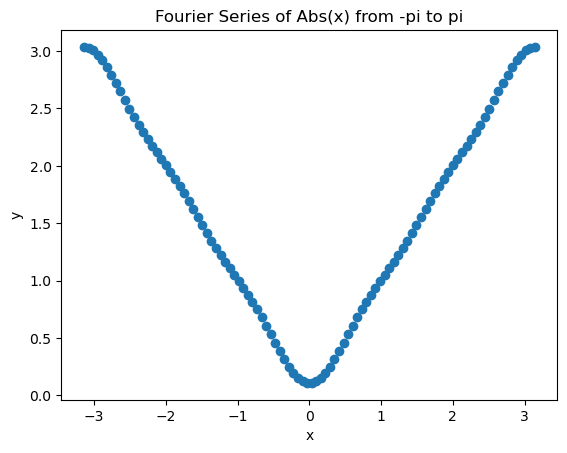

In [5]:
#Problem 4
#Part A, B, and C... D is in the block below
#Fourier Series
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


# initialize all of my variables
pi = sym.pi
nf = 5
T = sym.symbols('T', real = True, positive = True)
T = T.subs(T, pi)
x = sym.symbols('x')
n = sym.symbols('n', integer = True, positive = True)

function = sym.Abs(x)

#my a0 term that should be just pi/2
a0 = ((1/(2*T))*sym.integrate(function, (x, -T, T)))
print('a0 is:', a0, '\n')

#My an and bn terms just for printing out in pretty print
an = (1/T)*sym.integrate(function*sym.cos(n*x), (x, -T, T))
bn = (1/T)*sym.integrate(function*sym.sin(n*x), (x, -T, T))
print('My an term is:')
sym.pprint(an)
print('\n')
print('My bn term is:')
sym.pprint(bn)
print('\n')

#makes my *useful* an and bn terms used for calculating my fourier series graphs
an = (1/pi)*sym.integrate(function*sym.cos(n*x), (x, -T, T))
bn = (1/pi)*sym.integrate(function*sym.sin(n*x), (x, -T, T))

#array of x values ranging from -pi to pi for graphing
xvals = np.linspace(-np.pi, np.pi, 100)


def fourier_series(x, pi, nf):
    #globalize these three terms
    global a0, an, bn
    
    #evaluates each fourier an and bn until n = 5
    an_fourier = [an.subs(n, i) for i in range(1, nf+1)]
    bn_fourier = [bn.subs(n, i) for i in range(1, nf+1)]
    
    
    f = a0
    for ni in range(1, nf+1):
        f += an_fourier[ni-1]*sym.cos(ni*x)+bn_fourier[ni-1]*sym.sin(ni*x)
    return f



#for every value in the x array, it makes the value of the fourier series with the certain n and x value
fourier_list = [fourier_series(xi, pi, nf) for xi in xvals]

x_value_at_zero = fourier_series(0, pi, nf)
x_value_at_zero = x_value_at_zero.evalf()
print('The value of the fourier series with 5 non-zero terms is {:.3f} at x = 0.'.format(x_value_at_zero))


plt.scatter(xvals, fourier_list)
plt.title('Fourier Series of Abs(x) from -pi to pi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
######## Part D of Problem 4 #########
# This code can definitely be optimized, but I just didn't have the time. I basically copied my code from above except I calculated the fourier series for each n value until the fourier series <= .01. This code takes roughly 15 seconds to run... sorry! :( #



# initialize all of my variables
nf = 1
x_value_at_zero = fourier_series(0, pi, nf)
while x_value_at_zero >= .01:
    nf += 1
    x_value_at_zero = fourier_series(0, pi, nf)


    pi = sym.pi
    T = sym.symbols('T', real = True, positive = True)
    T = T.subs(T, pi)
    x = sym.symbols('x')
    n = sym.symbols('n', integer = True, positive = True)
    
    function = sym.Abs(x)
    
    #my a0 term that should be just pi/2
    a0 = ((1/(2*T))*sym.integrate(function, (x, -T, T)))
    

    
    #makes my useful an and bn terms used for calculating my fourier series graphs
    an = (1/pi)*sym.integrate(function*sym.cos(n*x), (x, -T, T))
    bn = (1/pi)*sym.integrate(function*sym.sin(n*x), (x, -T, T))
    
    #array of x values ranging from -pi to pi for graphing
    x = np.linspace(-np.pi, np.pi, 100)
    
    
    def fourier_series(x, pi, nf):
        #globalize these three terms
        global a0, an, bn
        
        #evaluates each fourier an and bn until n = 5
        an_fourier = [an.subs(n, i) for i in range(1, nf+1)]
        bn_fourier = [bn.subs(n, i) for i in range(1, nf+1)]
    
    
        f = a0
        for ni in range(1, nf+1):
            f += an_fourier[ni-1]*sym.cos(ni*x)+bn_fourier[ni-1]*sym.sin(ni*x)
        return f
    
print('The number of non-zero terms required for x = 0 to be <= .01 is:', nf)

The number of non-zero terms required for x = 0 to be <= .01 is: 63


In [9]:
#Problem 5
#Surface Integral
import sympy as sym
import numpy as np
#First way to do the integral -- from class using F dot n ds

x = sym.Symbol('x', integer = True)
y = sym.Symbol('y', integer = True)
z = sym.Symbol('z', integer = True)


G = x
F = x**2 + z
n = [sym.diff(F, i) for i in (x, y, z)]

magnitude_n = 0
for j in n:
    magnitude_n += j**2
magnitude_n = sym.sqrt(magnitude_n)


Integral = sym.integrate(sym.integrate(G*magnitude_n, (x, 0, np.sqrt(2.0))), (y, 0, 4))

print(Integral)

8.66666666666667
